In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/공모전/DB경제/unsupervised/train.csv")

In [ ]:
df

,DATE,RGDP,CPI,M2,RF,UNRATE,SP500
0,1985-01-01,4.555,3.641,9.182,10.683000,7.233,0.066160
1,1985-04-01,3.684,3.607,8.249,9.773651,7.300,0.042770
2,1985-07-01,4.262,3.352,9.185,9.281587,7.200,-0.000931
3,1985-10-01,4.182,3.514,8.627,8.845968,7.033,0.084636
4,1986-01-01,4.146,3.105,7.271,7.941833,7.033,0.120324
...,...,...,...,...,...,...,...
138,2019-07-01,2.076,1.764,5.258,1.632656,3.600,0.025913
139,2019-10-01,2.339,2.032,6.720,1.589677,3.600,0.059868
140,2020-01-01,0.319,2.105,7.851,1.093387,3.800,-0.075828
141,2020-04-01,-9.033,0.440,20.632,0.240794,13.067,0.055785


In [ ]:
Date = df.loc[:,"DATE"].to_frame() #학습과 무관한 날짜 데이터 따로 저장

In [ ]:
df = df.iloc[:,1:]

In [ ]:
scaler = MinMaxScaler() #데이터 스케일링

df_scaled = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [ ]:
score = [] #Centroid 별 score 저장을 위해 score 리스트 정의

for i in range(1,20):

  model = KMeans(n_clusters=i) #Centroid를 1~19까지 늘리면서 score 저장
  model.fit(df_scaled)
  score.append(abs(model.score(df_scaled)))

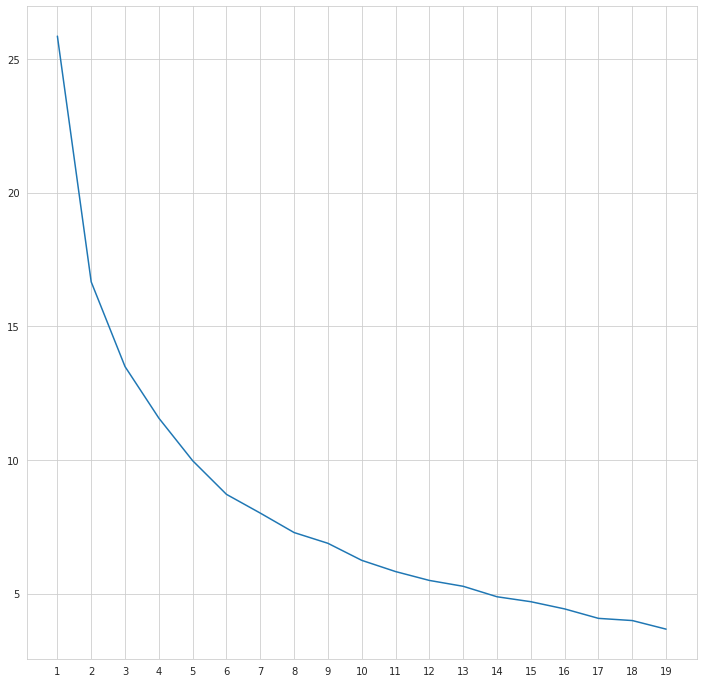

In [ ]:
#Score Plotting

sns.set_style("whitegrid")

center = list(range(1,20))

fig = plt.figure(figsize=(12,12))
ax = fig.subplots(1,1)
ax.plot(center,score)
ax.set_xticks(np.arange(1,20,1))

In [ ]:
kmean = KMeans(n_clusters=4,max_iter=300) #KMean 모델 정의

In [ ]:
cluster = pd.DataFrame(kmean.fit_predict(df_scaled),columns=["Label"]) #KMean 학습 진행

In [ ]:
kmean_result = pd.concat([Date,df_scaled,cluster],axis=1) #결과값 데이터프레임화

In [ ]:
kmean_result

,DATE,RGDP,CPI,M2,RF,UNRATE,SP500,Label
0,1985-01-01,0.948154,0.665736,0.378971,1.000000,0.383754,0.792339,3
1,1985-04-01,0.887377,0.661423,0.338649,0.913547,0.390831,0.730368,3
2,1985-07-01,0.927709,0.629075,0.379100,0.866766,0.380268,0.614585,3
3,1985-10-01,0.922127,0.649626,0.354985,0.825352,0.362628,0.841291,3
4,1986-01-01,0.919615,0.597742,0.296383,0.739395,0.362628,0.935843,3
...,...,...,...,...,...,...,...,...
138,2019-07-01,0.775173,0.427629,0.209387,0.139576,0.000000,0.685706,2
139,2019-10-01,0.793525,0.461626,0.272570,0.135490,0.000000,0.775669,2
140,2020-01-01,0.652571,0.470887,0.321449,0.088307,0.021126,0.416147,2
141,2020-04-01,0.000000,0.259673,0.873806,0.007250,1.000000,0.764851,1


In [ ]:
kmean_result[kmean_result.Label==1] #2020년 데이터와 동일하게 라벨링된 연도 확인

,DATE,RGDP,CPI,M2,RF,UNRATE,SP500,Label
96,2009-01-01,0.400809,0.180515,0.400363,0.105238,0.492976,0.349851,1
97,2009-04-01,0.356500,0.084359,0.376550,0.126527,0.602091,1.000000,1
98,2009-07-01,0.417487,0.000000,0.336747,0.132475,0.637266,0.905451,1
99,2009-10-01,0.643081,0.392617,0.216431,0.116506,0.668955,0.758794,1
100,2010-01-01,0.749634,0.502347,0.072000,0.124003,0.658392,0.748083,1
101,2010-04-01,0.825413,0.429024,0.065863,0.115467,0.637266,0.543389,1
102,2010-07-01,0.852069,0.356463,0.091880,0.063638,0.619732,0.657306,1
103,2010-10-01,0.809574,0.359888,0.125675,0.055968,0.623217,0.872903,1
104,2011-01-01,0.765055,0.476341,0.180863,0.094671,0.573888,0.830413,1
105,2011-04-01,0.750471,0.628314,0.217425,0.074132,0.577480,0.626519,1
